1) plot distribution count for each folder -partitioning - no labels
2) pixel level representation -> distribution of pixels across images
2) pixel level representation (group) -> distribution of pixels for foreground/retinal
3) image composition (whether got dent anot)
4) ratio between background and foreground - Done 
5) ratio between vessels and background - ??
6) average value of the each pixel and reconstruct to form a general image (set it as a benchmark)

In [7]:
#!/usr/bin/env python

####################
# Required Modules #
####################

# Generic/Built-in
import os 
import re
import itertools

# Libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Custom
from src.manifestations import mainifestations_main
from src.diagnosis import diagnosis_main, clean_diagnosis
from src.correlations import create_cramers_v_heatmap

In [8]:
%load_ext autoreload
%autoreload 2

# Level 1: Partitions

## <font color='orange'>Manifestation data

In [ ]:
# dir = "./raw/manifestations/annotations"
# df_manifestations = manifestations.main(dir)

In [9]:
# Creating dataframe with manifestation data (encoded)
dir = \
    "./raw/manifestations/annotations/"
dir_metatable = \
    "./raw/manifestations/stare_manifestations_v1.csv"
df_manifestations = mainifestations_main(dir, dir_metatable)
df_manifestations.head()

,RPED Manifestation,CME,ERM,Subretinal Fibrosis,CNV Manifestation,Drusen,Preretinal Hemmorhage,Subretinal Hemmorhage,Microaneurism or Dot Hemmorhage,VH,...,Macroaneurism,A-V Change,TXRD Schisis,Cotton-Wool Spot,Inner Retinal Infarct,Cherry Red Spot,Ghost BV,NVE,Photocoagular Scar,Emboli Manifestation
im0227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
im0210,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
im0333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
im0179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
im0038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# def rename_input_images(path, annotator):
#     i = 0
#     for filename in os.listdir(path):
#         os.rename(os.path.join(path,filename), 
#         os.path.join(path, os.path.splitext(filename)[0] + "." + annotator + '.ppm'))
#         i = i +1

In [ ]:
# rename_input_images('./raw/stare-images', 'ah')
# rename_input_images('./raw/stare-images-2', 'vk')

In [10]:
# stare_images = sorted(os.listdir("./stare-images/"))
# stare_labels: list[str] = sorted(os.listdir("./stare-labels/"))
file_names = sorted(os.listdir("./raw/stare-images/"))
print(file_names)

['im0001.ah.ppm', 'im0001.vk.ppm', 'im0002.ah.ppm', 'im0002.vk.ppm', 'im0003.ah.ppm', 'im0003.vk.ppm', 'im0004.ah.ppm', 'im0004.vk.ppm', 'im0005.ah.ppm', 'im0005.vk.ppm', 'im0044.ah.ppm', 'im0044.vk.ppm', 'im0077.ah.ppm', 'im0077.vk.ppm', 'im0081.ah.ppm', 'im0081.vk.ppm', 'im0082.ah.ppm', 'im0082.vk.ppm', 'im0139.ah.ppm', 'im0139.vk.ppm', 'im0162.ah.ppm', 'im0162.vk.ppm', 'im0163.ah.ppm', 'im0163.vk.ppm', 'im0235.ah.ppm', 'im0235.vk.ppm', 'im0236.ah.ppm', 'im0236.vk.ppm', 'im0239.ah.ppm', 'im0239.vk.ppm', 'im0240.ah.ppm', 'im0240.vk.ppm', 'im0255.ah.ppm', 'im0255.vk.ppm', 'im0291.ah.ppm', 'im0291.vk.ppm', 'im0319.ah.ppm', 'im0319.vk.ppm', 'im0324.ah.ppm', 'im0324.vk.ppm']


## <font color='orange'>Differentiating Left or Right eye

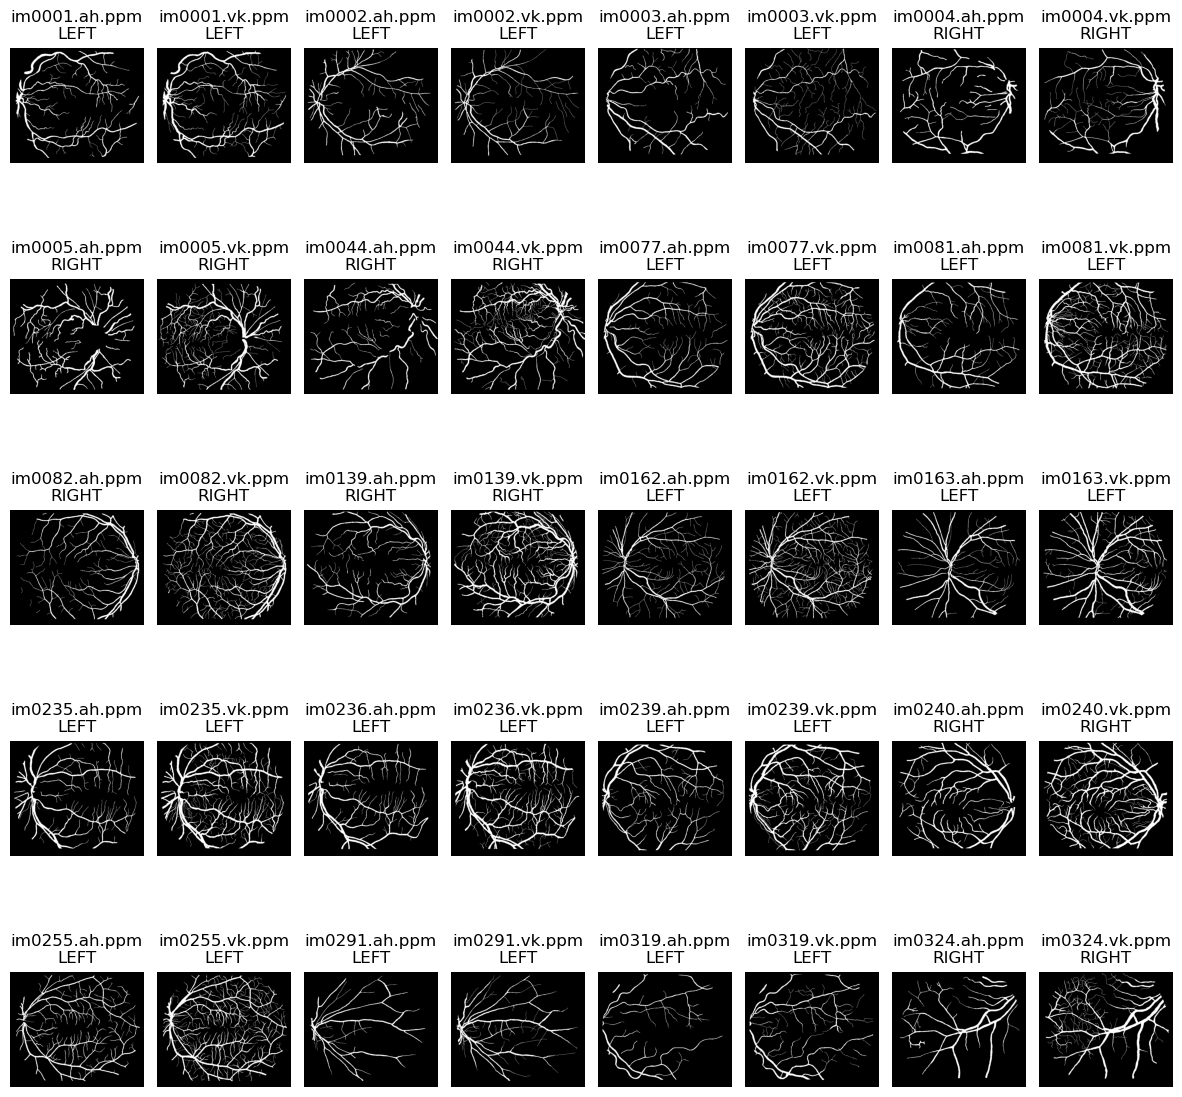

In [11]:
# plotting label images with left/right labels in image grid for visual check
diagnosis = clean_diagnosis()
lr = diagnosis.diff_lr_eye(
    count=0, 
    file_names=file_names, 
    dir_label="./raw/stare-labels/"
    )

## <font color='orange'> Diagnosis Data

In [12]:
# creating dataframe with diagnosis data, left or right eye and disease or non-disease
df_diagnosis = diagnosis_main(
    dir="./raw/stare-images/", 
    dir_mg_codes='./raw/diagnosis/all-mg-codes.txt', 
    dir_diag_code_csv='./raw/diagnosis/diagnosis-code.csv',
    lr=lr
    )
df_diagnosis.head()

/Users/ivangjj/AISG/AIAP-100E/fedseg/src/diagnosis.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_code = df_code.append(new_code, ignore_index=True)
/Users/ivangjj/AISG/AIAP-100E/fedseg/src/diagnosis.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_code = df_code.append(new_code2, ignore_index=True)
/Users/ivangjj/AISG/AIAP-100E/fedseg/src/diagnosis.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diag['Disease'][df_diag['Disease'] > 0] = 1


,Image name_annot,Annotator,Image name,Diagnosis Number,Diagnosis,Image name_annot_2,Diagnosis Number_2,Diagnosis_2,Left or Right eye,Disease
0,im0001.ah,ah,im0001,7,Background Diabetic Retinopathy,im0001.ah,0,Normal,LEFT,1
1,im0001.vk,vk,im0001,7,Background Diabetic Retinopathy,im0001.vk,0,Normal,LEFT,1
2,im0002.ah,ah,im0002,13,Choroidal Neovascularization,im0002.ah,9,Arteriosclerotic Retinopathy,LEFT,1
3,im0002.vk,vk,im0002,13,Choroidal Neovascularization,im0002.vk,9,Arteriosclerotic Retinopathy,LEFT,1
4,im0003.ah,ah,im0003,14,Others,im0003.ah,0,Normal,LEFT,1


In [13]:
df_diagnosis['Left or Right eye'].value_counts()

LEFT     26
RIGHT    14
Name: Left or Right eye, dtype: int64

<font color='yellow'>**Observation :**

Imbalance count of left / right eye images.

Left = 26 / 40 = 65%

Right = 14 / 40 = 35%

In [14]:
df_diagnosis['Disease'].value_counts()

1    22
0    18
Name: Disease, dtype: int64

<font color='yellow'>**Observation :**

Relatively balanced count of disease / non-disease eye images.

Disease : 1 = 22 / 40 = 55%

Non-disease : 0 = 18 / 40 = 45%

## <font color='orange'>Visual Check

In [15]:
#####################################################
# Functions to plot images in grid for visual check #
#####################################################
def plot_images(count, file_names, dir):
    """To create image grid (subpliots) for visual check.

    Args:
        count (int): count of files or images
        file_names (list[str]): list of files in the directory
        dir (str): directory path
    """
    f, axarr = plt.subplots(5, 8, figsize=(15, 15))
    plt.subplots_adjust(wspace = 0.1, hspace = 0)
    for i in range(5):
        for j in range(8):
            img = Image.open(dir + file_names[count])
            axarr[i,j].imshow(img)
            axarr[i,j].axis('off')
            axarr[i,j].title.set_text(file_names[count])
            count += 1

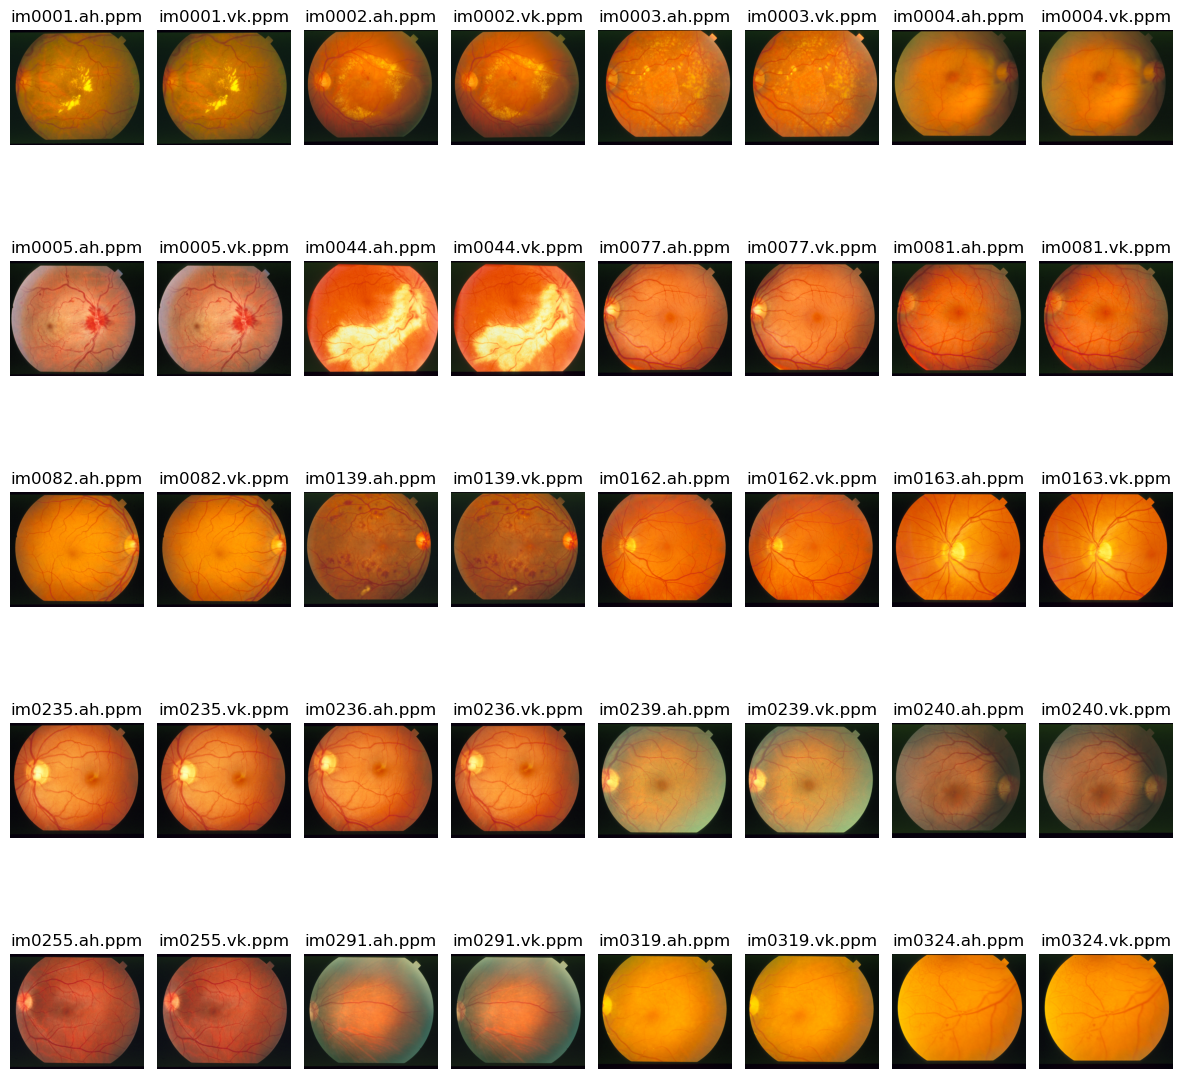

In [16]:
# Visual check via image grid of OCT images
try:
    plot_images(count=0, file_names=file_names, dir = "./raw/stare-images/")
except IndexError:
    pass

## <font color='orange'>Correlation Check

,Image name,Annotator,Left or Right eye,Disease
Image name,1.00000,0.00000,0.72548,0.72548
Annotator,0.00000,0.94865,0.00000,0.00000
Left or Right eye,0.72548,0.00000,0.94357,0.10293
Disease,0.72548,0.00000,0.10293,0.94813


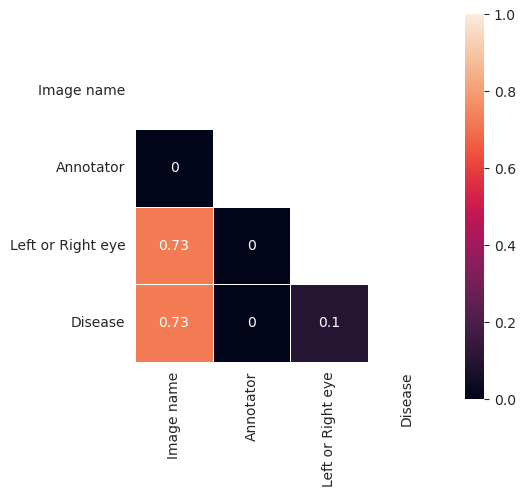

In [17]:
create_cramers_v_heatmap(
    df_diagnosis[["Image name", "Annotator", "Left or Right eye", "Disease"]]
    )

<font color='yellow'>**Observation :**

Strong correlation > 0.25, between 'image name' vs 'left or right eye' or 'disease'

No correlation = 0, between 'annotator' vs 'left or right eye' or 'disease'

In [18]:
# merging dataframes (diagnosis + manifestations) into one
df_merged_all = df_diagnosis.merge(
    df_manifestations, 
    left_on=['Image name'], 
    right_on = df_manifestations.index, 
    how='left')
df_merged_all.head()

,Image name_annot,Annotator,Image name,Diagnosis Number,Diagnosis,Image name_annot_2,Diagnosis Number_2,Diagnosis_2,Left or Right eye,Disease,...,Macroaneurism,A-V Change,TXRD Schisis,Cotton-Wool Spot,Inner Retinal Infarct,Cherry Red Spot,Ghost BV,NVE,Photocoagular Scar,Emboli Manifestation
0,im0001.ah,ah,im0001,7,Background Diabetic Retinopathy,im0001.ah,0,Normal,LEFT,1,...,0,0,0,0,0,0,0,0,0,0
1,im0001.vk,vk,im0001,7,Background Diabetic Retinopathy,im0001.vk,0,Normal,LEFT,1,...,0,0,0,0,0,0,0,0,0,0
2,im0002.ah,ah,im0002,13,Choroidal Neovascularization,im0002.ah,9,Arteriosclerotic Retinopathy,LEFT,1,...,0,0,0,0,0,0,0,0,0,0
3,im0002.vk,vk,im0002,13,Choroidal Neovascularization,im0002.vk,9,Arteriosclerotic Retinopathy,LEFT,1,...,0,0,0,0,0,0,0,0,0,0
4,im0003.ah,ah,im0003,14,Others,im0003.ah,0,Normal,LEFT,1,...,0,0,0,0,0,0,0,0,0,0


## <font color='orange'>Data Partitioning

In [19]:
def create_partitions(df_diag_lr):
    """Creating data partition
    default create 3 partitions based on 'Left or Right eye', 'Disease', 'Annotator'

    Args:
        df_diag_lr (DataFrame): dataframe containing data of left or right eye, disease and annotator

    Returns:
        DataFrame: dataframe with partition number
    """
    X = df_diag_lr.copy()
    X = X[['Image name', 'Left or Right eye', 'Disease', 'Annotator']]
    X['new index'] = X['Image name'] + '.' + X['Annotator'] 
    X.set_index('new index', inplace=True)
    X.index.name = None
    X.drop(columns=['Image name', 'Annotator'], inplace=True)
    X_train, P1 = train_test_split(
        X, 
        test_size=0.33, 
        stratify=X
        )
    P2, P3 = train_test_split(
        X_train, 
        test_size=0.5, 
        stratify=X_train
        )

    partition_files = [
        P1.index.tolist(), P2.index.tolist(), P3.index.tolist()
        ]
    partition_list = [
        [i+1] * len(part) for i, part in enumerate(partition_files)
        ]
    partition_files = list(
        itertools.chain(*partition_files)
        )
    partition_list  = list(
        itertools.chain(*partition_list)
        )
    part_df = pd.DataFrame(
        {'image_name':partition_files , "Partition":partition_list }
        )

    df_diag_lr_part = df_diag_lr.merge(
        part_df, 
        left_on = "Image name_annot", 
        right_on = "image_name", 
        how = "left"
        )
    df_diag_lr_part.drop(
        columns = ['image_name'], 
        inplace = True
        )
    return df_diag_lr_part

In [20]:
df = create_partitions(df_diagnosis)
df.head()

,Image name_annot,Annotator,Image name,Diagnosis Number,Diagnosis,Image name_annot_2,Diagnosis Number_2,Diagnosis_2,Left or Right eye,Disease,Partition
0,im0001.ah,ah,im0001,7,Background Diabetic Retinopathy,im0001.ah,0,Normal,LEFT,1,2
1,im0001.vk,vk,im0001,7,Background Diabetic Retinopathy,im0001.vk,0,Normal,LEFT,1,2
2,im0002.ah,ah,im0002,13,Choroidal Neovascularization,im0002.ah,9,Arteriosclerotic Retinopathy,LEFT,1,1
3,im0002.vk,vk,im0002,13,Choroidal Neovascularization,im0002.vk,9,Arteriosclerotic Retinopathy,LEFT,1,3
4,im0003.ah,ah,im0003,14,Others,im0003.ah,0,Normal,LEFT,1,3


# Level 2: Image composition 

In [21]:
def save_data(dir):
    """reading and saving image pixel data into list

    Args:
        dir (str): directory path

    Returns:
        List[int]: image pixel data
    """
    file_names= os.listdir(dir)
    file_names.sort()
    data = []
    
    for name in file_names:
        #im.shape: height x width x channel 
        #order of color is BGR
        im = cv.imread(dir + name)
        data.append(im)
    return data

In [22]:
file_names= os.listdir("./raw/stare-images/")
file_names.sort()
file_names

['im0001.ah.ppm',
 'im0001.vk.ppm',
 'im0002.ah.ppm',
 'im0002.vk.ppm',
 'im0003.ah.ppm',
 'im0003.vk.ppm',
 'im0004.ah.ppm',
 'im0004.vk.ppm',
 'im0005.ah.ppm',
 'im0005.vk.ppm',
 'im0044.ah.ppm',
 'im0044.vk.ppm',
 'im0077.ah.ppm',
 'im0077.vk.ppm',
 'im0081.ah.ppm',
 'im0081.vk.ppm',
 'im0082.ah.ppm',
 'im0082.vk.ppm',
 'im0139.ah.ppm',
 'im0139.vk.ppm',
 'im0162.ah.ppm',
 'im0162.vk.ppm',
 'im0163.ah.ppm',
 'im0163.vk.ppm',
 'im0235.ah.ppm',
 'im0235.vk.ppm',
 'im0236.ah.ppm',
 'im0236.vk.ppm',
 'im0239.ah.ppm',
 'im0239.vk.ppm',
 'im0240.ah.ppm',
 'im0240.vk.ppm',
 'im0255.ah.ppm',
 'im0255.vk.ppm',
 'im0291.ah.ppm',
 'im0291.vk.ppm',
 'im0319.ah.ppm',
 'im0319.vk.ppm',
 'im0324.ah.ppm',
 'im0324.vk.ppm']

In [23]:
data_labels = save_data("./raw/stare-labels/")
data_labels_grayscale = np.mean(data_labels, axis = 3)

In [24]:
label_names = os.listdir("./raw/stare-labels/")
label_names.sort()
label_names

['im0001.ah.ppm',
 'im0001.vk.ppm',
 'im0002.ah.ppm',
 'im0002.vk.ppm',
 'im0003.ah.ppm',
 'im0003.vk.ppm',
 'im0004.ah.ppm',
 'im0004.vk.ppm',
 'im0005.ah.ppm',
 'im0005.vk.ppm',
 'im0044.ah.ppm',
 'im0044.vk.ppm',
 'im0077.ah.ppm',
 'im0077.vk.ppm',
 'im0081.ah.ppm',
 'im0081.vk.ppm',
 'im0082.ah.ppm',
 'im0082.vk.ppm',
 'im0139.ah.ppm',
 'im0139.vk.ppm',
 'im0162.ah.ppm',
 'im0162.vk.ppm',
 'im0163.ah.ppm',
 'im0163.vk.ppm',
 'im0235.ah.ppm',
 'im0235.vk.ppm',
 'im0236.ah.ppm',
 'im0236.vk.ppm',
 'im0239.ah.ppm',
 'im0239.vk.ppm',
 'im0240.ah.ppm',
 'im0240.vk.ppm',
 'im0255.ah.ppm',
 'im0255.vk.ppm',
 'im0291.ah.ppm',
 'im0291.vk.ppm',
 'im0319.ah.ppm',
 'im0319.vk.ppm',
 'im0324.ah.ppm',
 'im0324.vk.ppm']

In [25]:
def img_composition_stats(data_labels: list)-> tuple[list, list]:
    """Generating statistical data on white pixels for images

    Args:
        data_labels (list): image pixel data

    Returns:
        tuple[list, list]: total of white pixel counts for each images,
        total of white pixel counts over total pixels for each images
    """
    data_labels_grayscale = np.mean(data_labels, axis = 3)
    black_count = [np.sum(image==0) for image in data_labels_grayscale]
    white_count = [np.sum(image==255) for image in data_labels_grayscale]
    print(stats.describe(white_count))
    white_percentage = [np.average(image==255)*100 for image in data_labels_grayscale]
    print(stats.describe(white_percentage))
    return white_count, white_percentage

In [26]:
# white pixel count and percentage for all 40 images
white_count, white_percentage = img_composition_stats(data_labels)

DescribeResult(nobs=40, minmax=(18245, 64715), mean=39153.5, variance=155973662.66666666, skewness=0.46015270707753664, kurtosis=-0.8222171219362595)
DescribeResult(nobs=40, minmax=(4.30814639905549, 15.280991735537189), mean=9.24521841794569, variance=8.696498798686198, skewness=0.4601527070775373, kurtosis=-0.82221712193626)


In [27]:
#check level 2
img = data_labels[0]
print(len(img[img==0]))
print(len(img[img==255]))
img[(img != 0) & (img != 255)]

1169103
101397


array([], dtype=uint8)

# 3. Pixel level

In [28]:
# obtain pixel distributions 
data = save_data("./raw/stare-images/")

In [29]:
# Statistical descriptors 
def stats_describe(data) -> tuple:
    """Statistical descriptors at pixel level

    Args:
        data (List[str]): Pixel distributions

    Returns:
        tuple: mean of pixel distribution value,
        standard deviation of pixel distribution value,
        most common pixel distribution value
    """
    pixel_mean = np.mean(data, axis = 0)
    pixel_sd = np.std(data, axis = 0)
    pixel_mode = stats.mode(data)
    pixel_mode = np.squeeze(pixel_mode[0], axis = 0 )
    try:
        pixel_cv = pixel_sd / pixel_mean
    except RuntimeWarning:
        print("Division by zero")
    return pixel_mean, pixel_sd, pixel_mode

In [30]:
pixel_mean_global, pixel_sd_global, pixel_mode_global =\
    stats_describe(data) 

/var/folders/k0/qgyscyyx4sgcwq0f4ynzfzqc0000gn/T/ipykernel_13979/2823372948.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pixel_mode = stats.mode(data)
/var/folders/k0/qgyscyyx4sgcwq0f4ynzfzqc0000gn/T/ipykernel_13979/2823372948.py:18: RuntimeWarning: invalid value encountered in true_divide
  pixel_cv = pixel_sd / pixel_mean


In [31]:
# Find Deviation of each image w.r.t Average pixels
def deviation(data, pixel_mean) -> tuple[list, list]:
    """Find Deviation of each image w.r.t Average pixels

    Args:
        data (List[str]): Pixel distributions
        pixel_mean (List[str]): mean of pixel distribution value

    Returns:
        tuple[list, list]: array of sum of pixels,
        array of mean of pixels
    """
    image_dev_pixel = data - pixel_mean
    image_dev_pixel_abs = abs(image_dev_pixel)
    image_deviations_sum = np.sum(image_dev_pixel_abs, axis = (1,2,3))
    image_deviations_mean = np.mean(image_dev_pixel_abs, axis = (1,2,3))
    return image_deviations_sum, image_deviations_mean

In [32]:
image_deviations_sum, image_deviations_mean = \
    deviation(data, pixel_mean_global)

In [33]:
image_deviations_sum

array([23926246.75      , 23926246.75      , 26620203.95000001,
       26620203.95000001, 22148301.95      , 22148301.95      ,
       21934203.45      , 21934203.45      , 32281782.64999998,
       32281782.64999998, 56322828.84999999, 56322828.84999999,
       18538821.05      , 18538821.05      , 16866185.44999999,
       16866185.44999999, 22889924.45      , 22889924.45      ,
       26641621.25      , 26641621.25      , 22523189.84999999,
       22523189.84999999, 28692752.25      , 28692752.25      ,
       19037958.55000001, 19037958.55000001, 17660568.25      ,
       17660568.25      , 34014753.25      , 34014753.25      ,
       38179297.35000002, 38179297.35000002, 26373025.75000001,
       26373025.75000001, 34127666.54999998, 34127666.54999998,
       30592581.25      , 30592581.25      , 37868626.84999999,
       37868626.84999999])

In [34]:
image_deviations_mean

array([18.83215014, 18.83215014, 20.95254148, 20.95254148, 17.43274455,
       17.43274455, 17.2642294 , 17.2642294 , 25.40872306, 25.40872306,
       44.33123089, 44.33123089, 14.59175211, 14.59175211, 13.27523451,
       13.27523451, 18.01646946, 18.01646946, 20.96939886, 20.96939886,
       17.7278157 , 17.7278157 , 22.58382704, 22.58382704, 14.98461909,
       14.98461909, 13.90048662, 13.90048662, 26.77272983, 26.77272983,
       30.05060791, 30.05060791, 20.75798957, 20.75798957, 26.86160295,
       26.86160295, 24.07916667, 24.07916667, 29.80608174, 29.80608174])

In [35]:
print(f"max index: \
    {np.argmax(image_deviations_sum)}")
print(f"min index: \
    {np.argmin(image_deviations_sum)}")
print(f"median index: \
    {np.argsort(image_deviations_sum )[len(image_deviations_sum )//2]}")

max index:     10
min index:     14
median index:     3


In [36]:
# summary dataframe with statistical data
summary = df.copy()[['Image name_annot', 'Left or Right eye', 'Disease', 'Partition']]
summary['White Count'] = white_count
summary['White Percentage'] = white_percentage
summary['Image Deviation Sum'] = image_deviations_sum
summary['Image Deviation Mean'] = image_deviations_mean
summary.sort_values(by=['Partition'])

,Image name_annot,Left or Right eye,Disease,Partition,White Count,White Percentage,Image Deviation Sum,Image Deviation Mean
19,im0139.vk,RIGHT,1,1,64715,15.280992,26641621.25,20.969399
35,im0291.vk,LEFT,1,1,26150,6.174734,34127666.55,26.861603
29,im0239.vk,LEFT,0,1,53071,12.531523,34014753.25,26.772730
27,im0236.vk,LEFT,0,1,56222,13.275561,17660568.25,13.900487
23,im0163.vk,LEFT,0,1,49105,11.595041,28692752.25,22.583827
21,im0162.vk,LEFT,0,1,48502,11.452656,22523189.85,17.727816
20,im0162.ah,LEFT,0,1,30180,7.126328,22523189.85,17.727816
38,im0324.ah,RIGHT,1,1,28261,6.673200,37868626.85,29.806082
17,im0082.vk,RIGHT,0,1,51894,12.253601,22889924.45,18.016469
13,im0077.vk,LEFT,1,1,55012,12.989847,18538821.05,14.591752


In [38]:
pd.set_option('float_format', '{:f}'.format)
summary.groupby(['Partition']).mean()

,Disease,White Count,White Percentage,Image Deviation Sum,Image Deviation Mean
Partition,,,,,
1,0.571429,41959.214286,9.907725,29174362.514286,22.962898
2,0.538462,42026.923077,9.923713,29749316.996154,23.415440
3,0.538462,33258.538462,7.853256,24561452.557692,19.332115


In [45]:
summary[['White Count', 'White Percentage', 'Image Deviation Sum', 'Image Deviation Mean']].mean()

White Count               39153.500000
White Percentage              9.245218
Image Deviation Sum    27862026.985000
Image Deviation Mean         21.929970
dtype: float64